
## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [4]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [5]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

flight_day
Mon    8102
Wed    7674
Tue    7673
Thu    7424
Fri    6761
Sun    6554
Sat    5812
Name: count, dtype: int64


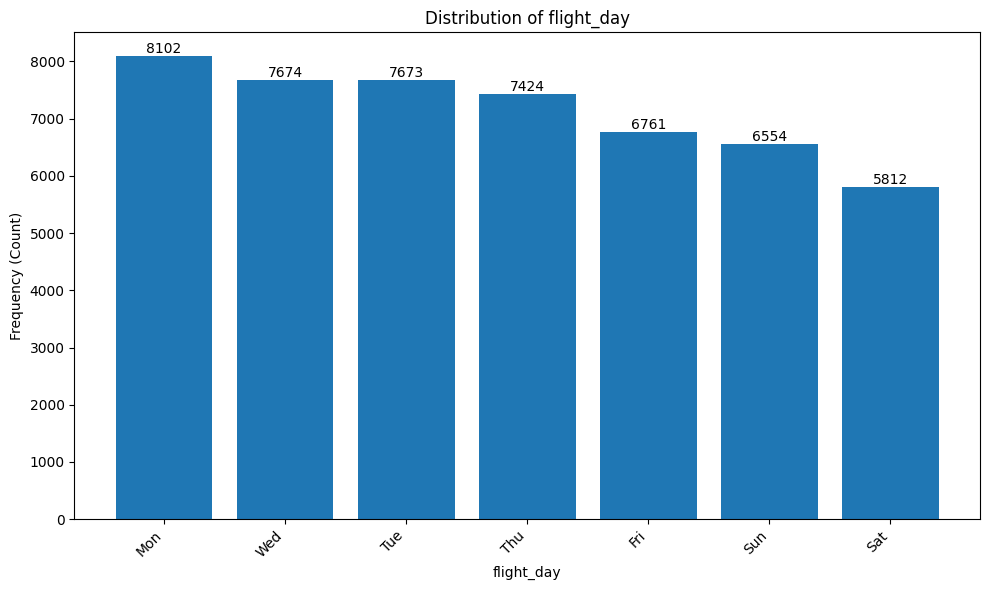

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Identify the Categorical Column
# Replace 'your_categorical_column' with the actual name of the column
categorical_column = 'flight_day'  # Example: 'flight_class', 'payment_method', etc.

# Check if the column is indeed categorical (object or category dtype)
if df[categorical_column].dtype not in ['object', 'category']:
    try:
        # Attempt conversion if it's not already the correct type (e.g., numeric codes)
        df[categorical_column] = df[categorical_column].astype('category') # or .astype(str) if you want string labels
    except: #If conversion to category fails
        raise ValueError(f"Column '{categorical_column}' is not categorical or cannot be converted.")

# 2. Calculate Frequencies (Counts) of Each Category

# a) Using pandas value_counts() (recommended):
category_counts = df[categorical_column].value_counts()
print(category_counts)

# b) Using seaborn countplot (simpler for plotting directly):
# sns.countplot(x=categorical_column, data=df)
# plt.show()  # If you use this method, you can skip steps 3 and 4


# 3. Create the Bar Chart (Matplotlib)

plt.figure(figsize=(10, 6))  # Adjust figure size as needed

plt.bar(category_counts.index, category_counts.values)

# or for horizontal bar chart
# plt.barh(category_counts.index, category_counts.values)

# 4. Customize the Plot (Important for clarity and presentation)

plt.title(f'Distribution of {categorical_column}')
plt.xlabel(categorical_column)
plt.ylabel('Frequency (Count)')

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if they are long

# Add count labels on top of the bars (optional but good for readability)
for i, count in enumerate(category_counts):
    plt.text(i, count, str(count), ha='center', va='bottom') # or ha='center', va='top' for horizontal bars

plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()



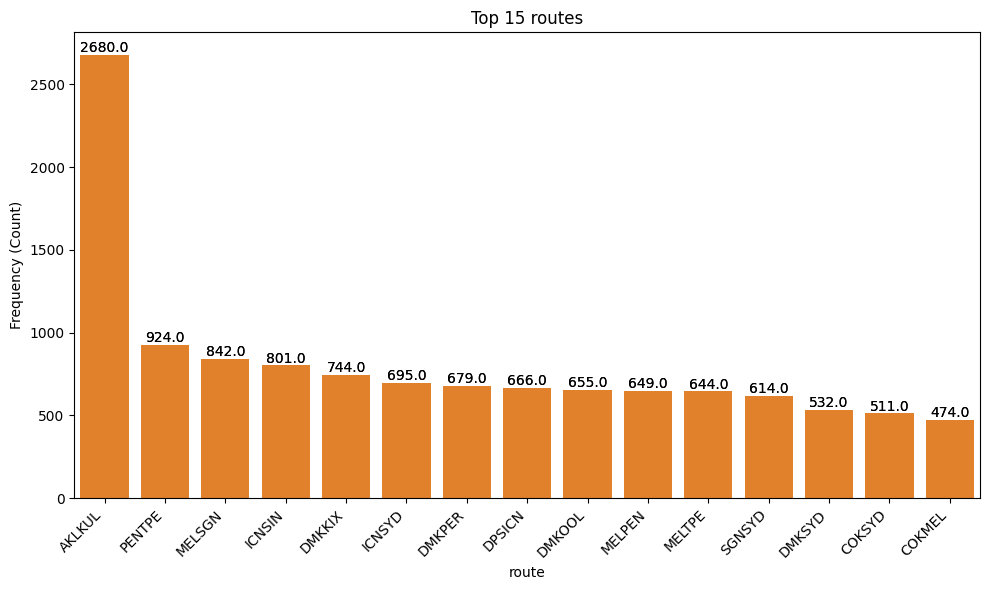

In [7]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Identify the Categorical Column
# Replace 'your_categorical_column' with the actual name of the column
categorical_column = 'route'  # Example: 'flight_class', 'payment_method', etc.

# Check if the column is indeed categorical (object or category dtype)
if df[categorical_column].dtype not in ['object', 'category']:
    try:
        # Attempt conversion if it's not already the correct type (e.g., numeric codes)
        df[categorical_column] = df[categorical_column].astype('category') # or .astype(str) if you want string labels
    except: #If conversion to category fails
        raise ValueError(f"Column '{categorical_column}' is not categorical or cannot be converted.")

# 2. Calculate Frequencies (Counts) of Each Category

# a) Using pandas value_counts() (recommended):
category_counts = df[categorical_column].value_counts()
top_15_categories = category_counts.head(15)

# b) Using seaborn countplot (simpler for plotting directly):
# sns.countplot(x=categorical_column, data=df)
# plt.show()  # If you use this method, you can skip steps 3 and 4


plt.figure(figsize=(10, 6))
sns.countplot(x=categorical_column, data=df, order=top_15_categories.index) #Order from value_counts()
plt.title(f'Top 15 routes')
plt.xlabel(categorical_column)
plt.ylabel('Frequency (Count)')
plt.xticks(rotation=45, ha='right')
for p in sns.countplot(x=categorical_column, data=df, order=top_15_categories.index).patches:
    plt.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.tight_layout()
plt.show()


In [8]:
df = df.drop(columns=['booking_origin', 'route'])

In [9]:


mapping2 = {
    "RoundTrip": 1,
    "OneWay": 2,
    "CircleTrip": 3,
}

df["trip_type"] = df["trip_type"].map(mapping2)

mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

binary_map = {"Internet": 1.0, "Mobile": 0.0}
df["sales_channel"] = [binary_map[x] for x in df["sales_channel"]]

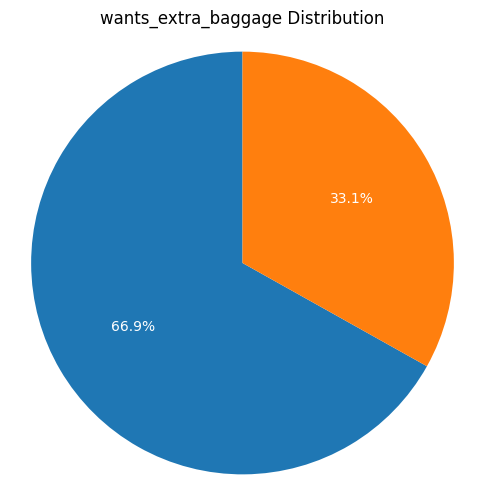

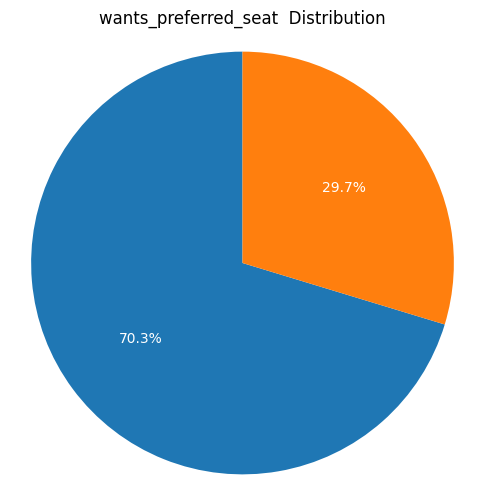

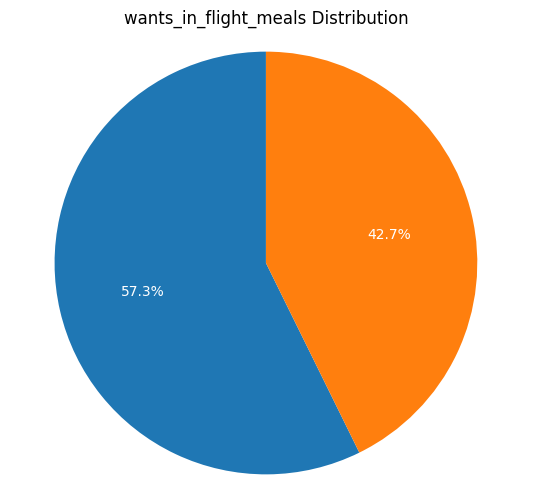

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_binary_pie(df, binary_column, title=None):
    """
    Plots a pie chart for a binary column in a Pandas DataFrame.

    Args:
        df: The Pandas DataFrame.
        binary_column: The name of the binary column (str).
        title (optional): The title for the pie chart (str). If None, the column name is used.

    Raises:
        TypeError: If the specified column is not present or is not of boolean or numerical (0/1) type.
    """

    if binary_column not in df.columns:
        raise TypeError(f"Column '{binary_column}' not found in DataFrame.")

    if df[binary_column].dtype not in ['bool', 'int64', 'float64']:  # Check for boolean or numeric types
         try:
            df[binary_column] = df[binary_column].astype(bool)
         except:
             raise TypeError(f"Column '{binary_column}' must be boolean or numerical (0/1).")


    counts = df[binary_column].value_counts()

    if len(counts) != 2:  # Ensure it's actually a binary column
        raise ValueError(f"Column '{binary_column}' is not binary (should have exactly two unique values).")

    labels = counts.index.tolist()

    if True in labels and False in labels:
        labels = ['True', 'False']
    elif 1 in labels and 0 in labels:
        labels = ['1', '0']
    elif 1.0 in labels and 0.0 in labels:
        labels = ['1.0', '0.0']




    plt.figure(figsize=(6, 6))  # Adjust figure size as needed

    plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, textprops={'color':"w"}) #autopct adds percentages, startangle rotates, textprops changes text color

    if title is None:
        title = binary_column
    plt.title(title)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.show()



plot_binary_pie(df, 'wants_extra_baggage', title='wants_extra_baggage Distribution')
plot_binary_pie(df, 'wants_preferred_seat', title='wants_preferred_seat  Distribution')
plot_binary_pie(df, 'wants_in_flight_meals', title='wants_in_flight_meals Distribution')




In [ ]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Separate features (X) and target (y)
X = df.drop('booking_complete', axis=1)
y = df['booking_complete']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) #Stratify for class balance

# Train the model (Gradient Boosting example)

gb_model = RandomForestClassifier(random_state=42)  # Or RandomForestClassifier
gb_model.fit(X_train, y_train)

# Make predictions
y_pred = gb_model.predict(X_test)
y_prob = gb_model.predict_proba(X_test)[:, 1] #Get probability scores for AUC


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
y_test.value_counts()

In [ ]:
print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")

print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred)}")
print(f"Precision: {metrics.precision_score(y_test, y_pred)}")
print(f"Recall: {metrics.recall_score(y_test, y_pred)}")

In [ ]:
feature_importances = pd.DataFrame({
    'features': X_train.columns,
    'importance':gb_model.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()


plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='b', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()

In [ ]:
proba_predictions =gb_model.predict_proba(X_test)
probabilities = proba_predictions[:, 1]

X_test = X_test.reset_index()
X_test.drop(columns='index', inplace=True)

X_test['booking_complete'] = y_pred.tolist()
X_test['booking_probability'] = probabilities.tolist()
X_test.to_csv('predictions.csv')